In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
os.chdir('<filepath>')
df1 = pd.read_csv('Social_Network_Ads.csv')
print(df1)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    11021175    Male   42           121315          0
1    17782313    Male   53            67214          0
2    14603818  Female   59           111005          0
3    18188198  Female   39            53414          0
4    19357305    Male   39           114285          0
..        ...     ...  ...              ...        ...
395  10220446  Female   20           141231          1
396  12387292    Male   50            75848          1
397  10715173  Female   25            82560          1
398  10016842    Male   55           147667          0
399  11699655  Female   54           134972          1

[400 rows x 5 columns]


In [3]:
#age and estimated salary as x and purchased as y variable
x = df1.iloc[:,2:4].values
print(x)
y = df1.iloc[:,4].values
print(y)

[[    42 121315]
 [    53  67214]
 [    59 111005]
 [    39  53414]
 [    39 114285]
 [    39 107458]
 [    20  85582]
 [    59 148335]
 [    48  80579]
 [    42 114204]
 [    32  87786]
 [    49 113544]
 [    55  88300]
 [    54 147066]
 [    57 139622]
 [    41 134716]
 [    51 116333]
 [    55  72567]
 [    44 123254]
 [    47 113548]
 [    52  79343]
 [    20 106149]
 [    40  59674]
 [    52  76333]
 [    28 118742]
 [    22 105897]
 [    25 114815]
 [    38  85428]
 [    57 114005]
 [    57 133402]
 [    43 106726]
 [    35  84550]
 [    34  96296]
 [    32  68964]
 [    55  90946]
 [    48  51787]
 [    22  53940]
 [    42 138928]
 [    59 116474]
 [    23  97284]
 [    40 132951]
 [    24 119308]
 [    50 120675]
 [    41 113547]
 [    52 102686]
 [    34 140262]
 [    20  54075]
 [    25  63715]
 [    46  56058]
 [    58  65052]
 [    38  72107]
 [    21 108656]
 [    42 120639]
 [    31  68033]
 [    26  80283]
 [    47  60952]
 [    31 123137]
 [    36  98529]
 [    25 12130

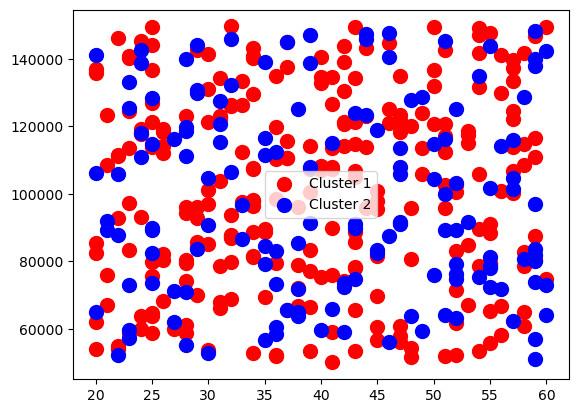

In [4]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
print(x)

[[ 0.17951354  0.76103154]
 [ 1.11315372 -1.14804259]
 [ 1.622412    0.39722026]
 [-0.0751156  -1.63500628]
 [-0.0751156   0.51296235]
 [-0.0751156   0.27205647]
 [-1.68776681 -0.49988685]
 [ 1.622412    1.71449234]
 [ 0.68877182 -0.67642883]
 [ 0.17951354  0.51010409]
 [-0.66925025 -0.42211381]
 [ 0.7736482   0.48681452]
 [ 1.28290648 -0.40397617]
 [ 1.1980301   1.66971285]
 [ 1.45265924  1.40703476]
 [ 0.09463716  1.23391563]
 [ 0.94340096  0.58523059]
 [ 1.28290648 -0.95915007]
 [ 0.3492663   0.82945347]
 [ 0.60389544  0.48695567]
 [ 1.02827734 -0.72004384]
 [-1.68776681  0.2258655 ]
 [ 0.00976078 -1.41410826]
 [ 1.02827734 -0.82625839]
 [-1.00875577  0.67023751]
 [-1.51801405  0.21697311]
 [-1.26338491  0.53166458]
 [-0.15999198 -0.50532108]
 [ 1.45265924  0.50308193]
 [ 1.45265924  1.18754822]
 [ 0.26438992  0.24622622]
 [-0.41462111 -0.53630326]
 [-0.49949749 -0.12181953]
 [-0.66925025 -1.08628994]
 [ 1.28290648 -0.31060618]
 [ 0.68877182 -1.6924186 ]
 [-1.51801405 -1.6164452 ]
 

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
print (x.shape)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(400, 2)
(320, 2)
(80, 2)
(320,)
(80,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred = KNN.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0]


In [9]:
df_ypred = pd.DataFrame(y_pred,columns = ['Predictions'])
results = pd.concat([pd.DataFrame(x_test, columns = ['Age', 'Salary']),
                     pd.DataFrame(y_test, columns = ['Salary']), df_ypred],axis = 1)
print(results)
print(results.head(50))

         Age    Salary  Salary  Predictions
0   0.094637 -1.198609       1            0
1   1.282906 -0.647140       1            0
2  -1.008756 -1.445337       0            0
3  -1.348261 -1.265867       0            0
4  -1.093632 -1.000895       1            0
..       ...       ...     ...          ...
75 -0.754127 -1.119142       0            0
76  0.264390  0.246226       0            0
77 -0.159992 -0.982440       1            0
78 -1.178509  0.513703       0            0
79  0.519019  1.686086       1            0

[80 rows x 4 columns]
         Age    Salary  Salary  Predictions
0   0.094637 -1.198609       1            0
1   1.282906 -0.647140       1            0
2  -1.008756 -1.445337       0            0
3  -1.348261 -1.265867       0            0
4  -1.093632 -1.000895       1            0
5  -1.008756 -1.362236       0            0
6   0.688772 -0.137346       0            0
7   1.452659 -1.324126       1            0
8   0.858525  0.160514       1            0
9   1.367

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.625


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        52
           1       0.43      0.21      0.29        28

    accuracy                           0.62        80
   macro avg       0.55      0.53      0.52        80
weighted avg       0.58      0.62      0.58        80



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  8]
 [22  6]]


In [15]:
#predicting for full dataset
y_pred = KNN.predict(x)
print(y_pred)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0]


In [16]:
df_ypred = pd.DataFrame(y_pred,columns = ['Prediction'])
result = pd.concat ([df1,df_ypred],axis = 1 )
result.to_excel('Full_Dataset_Prediction.xlsx')
print (result.head(50))

     User ID  Gender  Age  EstimatedSalary  Purchased  Prediction
0   11021175    Male   42           121315          0           0
1   17782313    Male   53            67214          0           0
2   14603818  Female   59           111005          0           0
3   18188198  Female   39            53414          0           0
4   19357305    Male   39           114285          0           0
5   19524602    Male   39           107458          0           0
6   19455396  Female   20            85582          0           0
7   16879913  Female   59           148335          1           1
8   11838352    Male   48            80579          0           1
9   13118940  Female   42           114204          0           0
10  19524480  Female   32            87786          0           0
11  12784093  Female   49           113544          0           1
12  12895966    Male   55            88300          0           0
13  14674114    Male   54           147066          0           0
14  123932

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.6825


In [18]:
from sklearn.metrics import classification_report
print(classification_report (y,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       257
           1       0.58      0.41      0.48       143

    accuracy                           0.68       400
   macro avg       0.65      0.62      0.62       400
weighted avg       0.67      0.68      0.67       400



In [19]:
cm = confusion_matrix (y,y_pred)
print (cm)	

[[215  42]
 [ 85  58]]


In [20]:
(222+52)/400

0.685

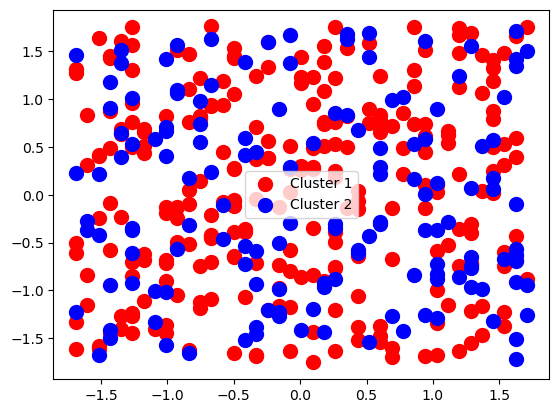

In [21]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

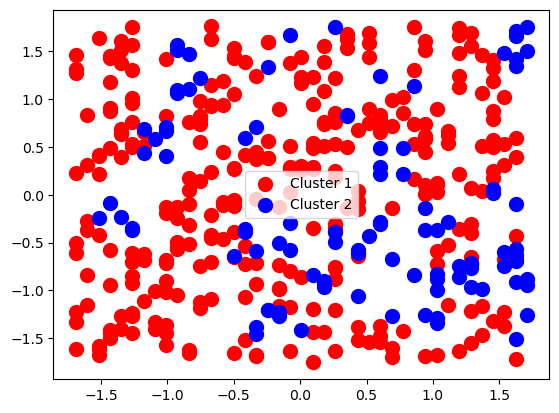

In [22]:
plt.scatter (x[y_pred == 0,0],x[y_pred == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_pred == 1,0],x[y_pred == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show() #this is the prediciton representation, so varies from initial records. More records vary in category 0(red)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNN1 = KNeighborsClassifier(n_neighbors =1 , metric = 'minkowski', p= 1) #changed n and p to 1, so checks with 1 nearby point
KNN1.fit(x_train,y_train)
print (KNN1)

KNeighborsClassifier(n_neighbors=1, p=1)


In [24]:
y_pred = KNN1.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1]


In [25]:
df_ypred = pd.DataFrame(y_pred,columns = ['Prediction'])
result = pd.concat ([pd.DataFrame (x_test, columns =['Age', 'Salary']) , 
                     pd.DataFrame (y_test,columns = ['Purchased']) ,df_ypred],axis = 1 )
print (result)

         Age    Salary  Purchased  Prediction
0   0.094637 -1.198609          1           0
1   1.282906 -0.647140          1           0
2  -1.008756 -1.445337          0           0
3  -1.348261 -1.265867          0           0
4  -1.093632 -1.000895          1           1
..       ...       ...        ...         ...
75 -0.754127 -1.119142          0           0
76  0.264390  0.246226          0           0
77 -0.159992 -0.982440          1           0
78 -1.178509  0.513703          0           0
79  0.519019  1.686086          1           1

[80 rows x 4 columns]


In [26]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.625


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        52
           1       0.46      0.43      0.44        28

    accuracy                           0.62        80
   macro avg       0.58      0.58      0.58        80
weighted avg       0.62      0.62      0.62        80



In [28]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_pred)
print (cm)	

[[38 14]
 [16 12]]


In [29]:
y_pred = KNN1.predict(x)
print (y_pred)

[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0
 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1]


In [30]:
accuracy = accuracy_score (y,y_pred)
print (accuracy) #testing with full dataset

0.925


In [31]:
cm = confusion_matrix (y,y_pred)
print (cm)	

[[243  14]
 [ 16 127]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       257
           1       0.90      0.89      0.89       143

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400



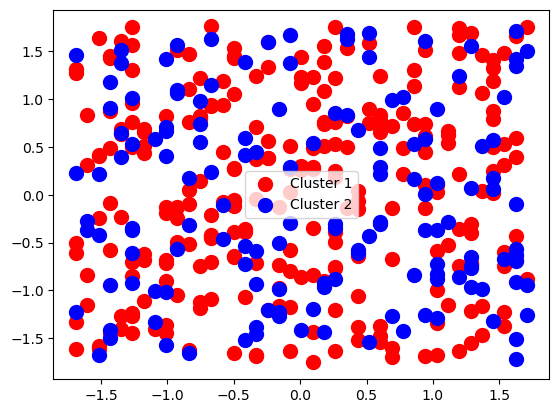

In [33]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

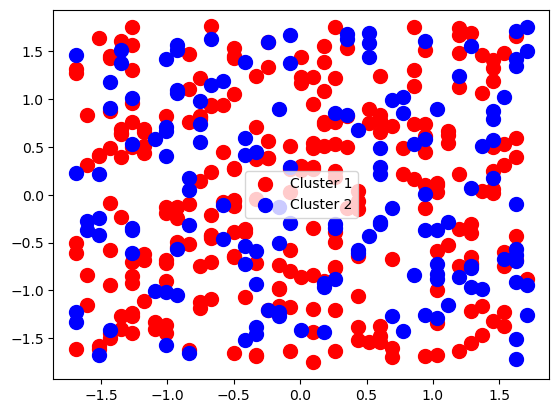

In [34]:
plt.scatter (x[y_pred == 0,0],x[y_pred == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_pred == 1,0],x[y_pred == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=1)
KNN5.fit(x_train,y_train)
y_pred5 = KNN5.predict(x)
print(y_pred5)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0]


In [ ]:
accuracy = accuracy_score(y,y_pred)
print(accuracy)

0.9175


In [ ]:
cm = confusion_matrix (y,y_pred5)
print (cm)	

[[226  31]
 [ 90  53]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report (y,y_pred5, zero_division=0))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       257
           1       0.63      0.37      0.47       143

    accuracy                           0.70       400
   macro avg       0.67      0.63      0.63       400
weighted avg       0.69      0.70      0.67       400



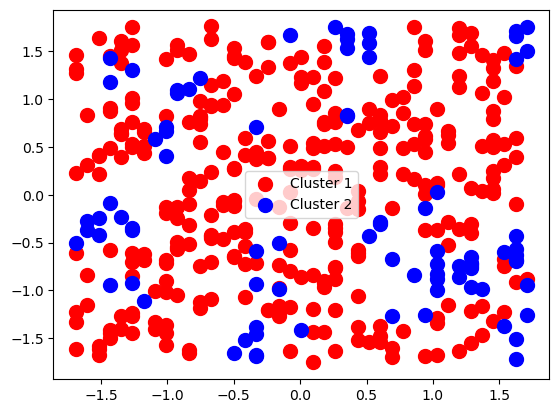

In [ ]:
plt.scatter (x[y_pred5 == 0,0],x[y_pred5== 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_pred5 == 1,0],x[y_pred5 == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()